In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.datasets import make_classification

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Impute missing values with mean
diabetes_data.fillna(diabetes_data.mean(), inplace=True)

In [14]:
# Split dataset into features and target variable
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Create SVM models with different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    # Create SVM classifier
    clf = SVC(kernel=kernel, random_state=42)
    
    # Train SVM classifier
    clf.fit(X_train, y_train)
    
    # Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy with {kernel} kernel: {accuracy:.2f}')

Accuracy with linear kernel: 0.75
Accuracy with rbf kernel: 0.74
Accuracy with poly kernel: 0.75
Accuracy with sigmoid kernel: 0.68


Text(0.5, 1.0, 'Correlation Heatmap')

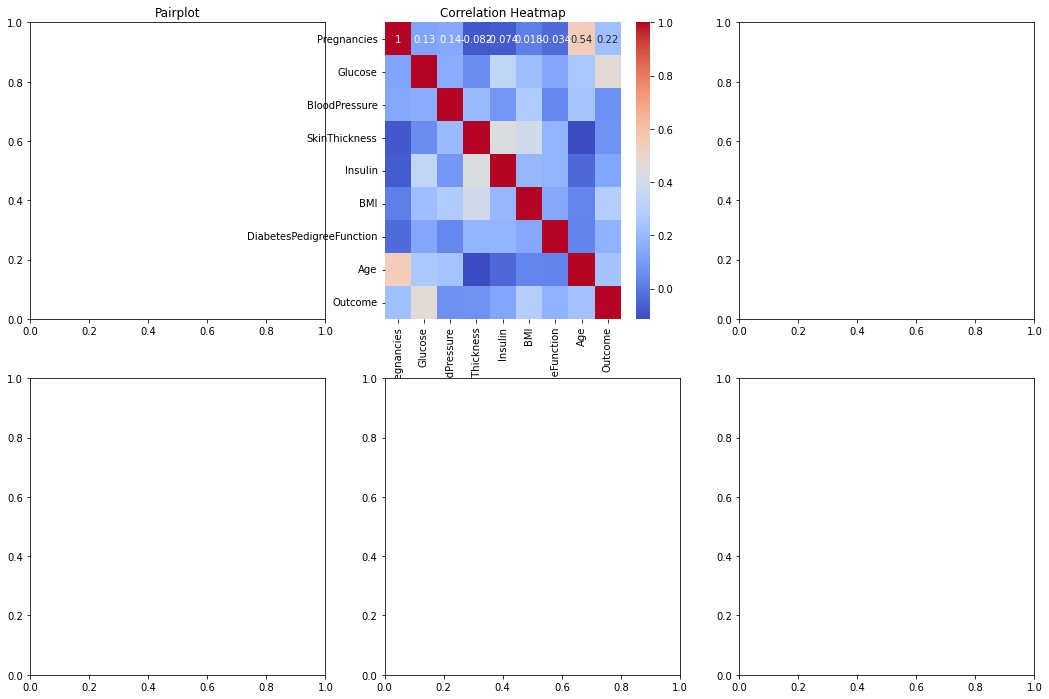

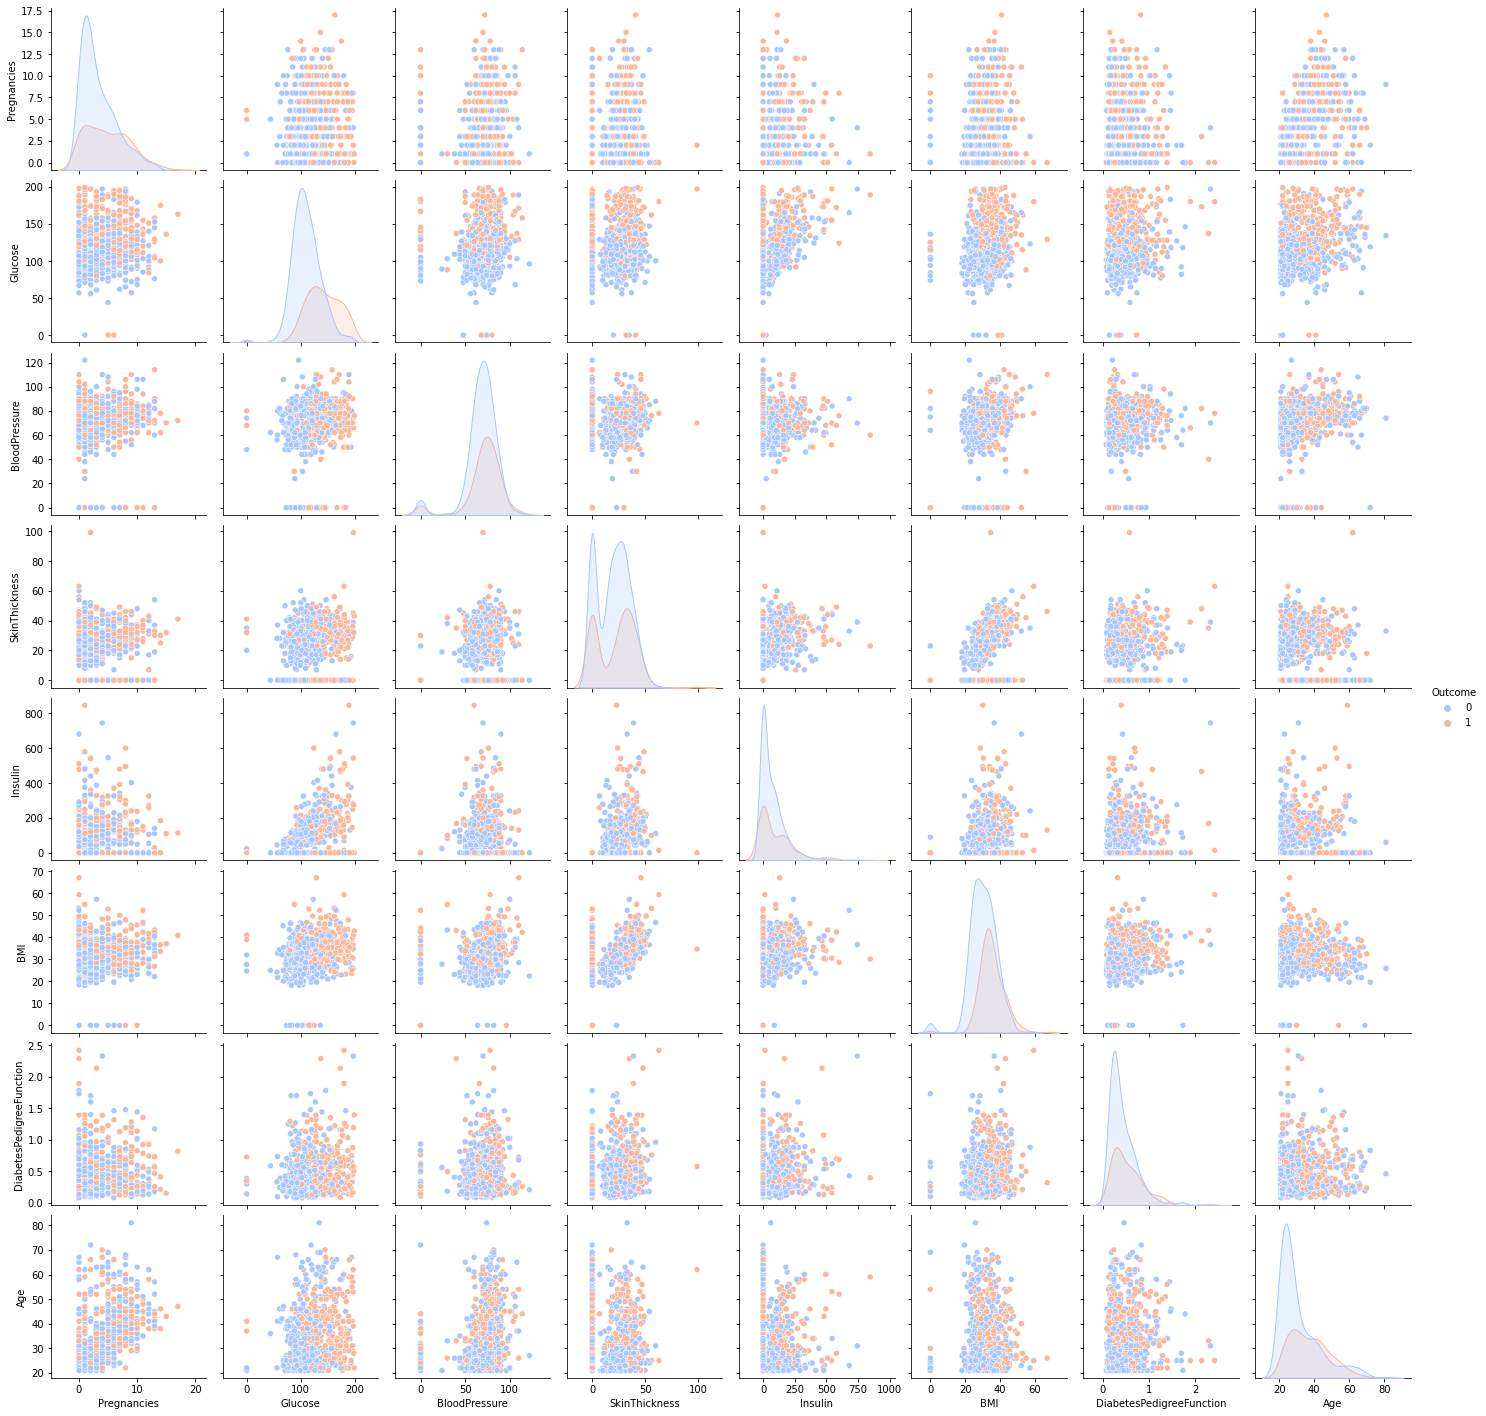

In [34]:
# Create figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Pairplot
sns.pairplot(diabetes_data, hue='Outcome', palette='coolwarm')
axs[0, 0].set_title('Pairplot')

# Correlation Heatmap
sns.heatmap(diabetes_data.corr(), annot=True, cmap='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Correlation Heatmap')

In [18]:
# Create synthetic data for visualization
X_vis, y_vis = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    n_clusters_per_class=1, random_state=42)


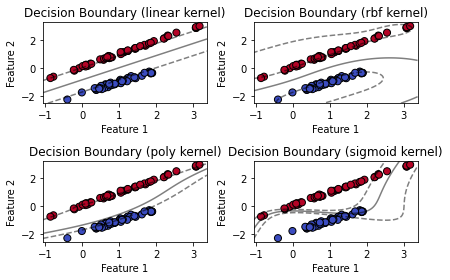

In [20]:
for i, kernel in enumerate(kernels):
    plt.subplot(2, 2, i + 1)
    clf = SVC(kernel=kernel, random_state=42)
    clf.fit(X_vis, y_vis)
    
    plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='coolwarm', s=50, edgecolors='k')
    
    # Plot decision boundaries
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    
    plt.title(f'Decision Boundary ({kernel} kernel)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()